In [1]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128 (from 1)
Receiving objects: 100% (131/131), 1.13 MiB | 2.66 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch


In [3]:
# Step 3: Pre-trained 모델 다운로드 (FFHQ 모델)
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

--2024-09-14 07:53:40--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 13.226.210.43, 13.226.210.22, 13.226.210.59, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|13.226.210.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M   120MB/s    in 3.0s    

2024-09-14 07:53:44 (120 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



In [4]:
# Step 4: 여러 시드로 이미지를 생성하여 다양한 얼굴을 탐색합니다 (trunc=1, seeds=10-20)
!python generate.py --outdir=out --trunc=1 --seeds=10-20 --network=./ffhq.pkl

# Step 5: truncation 값을 낮추어 더욱 평균적인 얼굴을 생성합니다 (trunc=0.5, seed=42)
!python generate.py --outdir=out --trunc=0.5 --seeds=42 --network=./ffhq.pkl

Loading networks from "./ffhq.pkl"...
/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesI

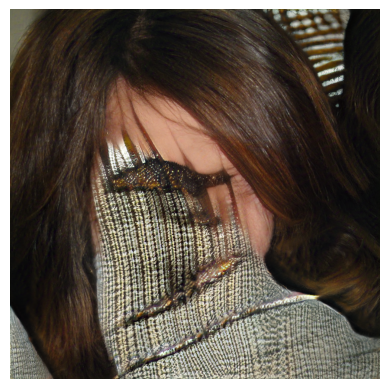

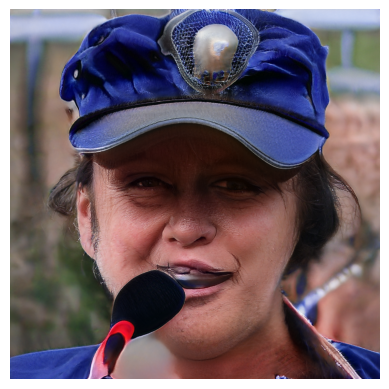

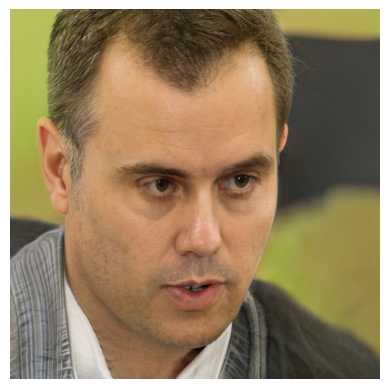

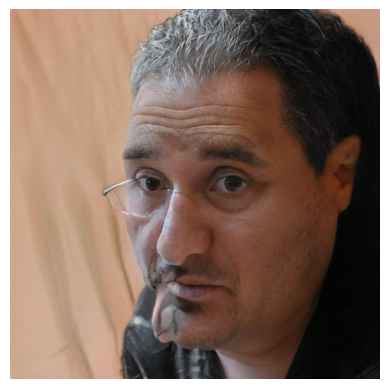

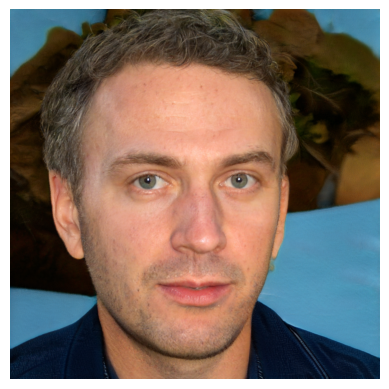

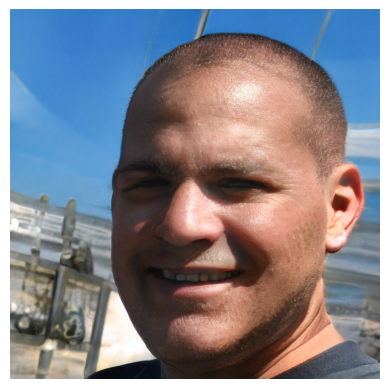

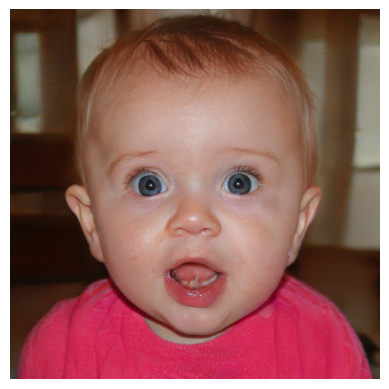

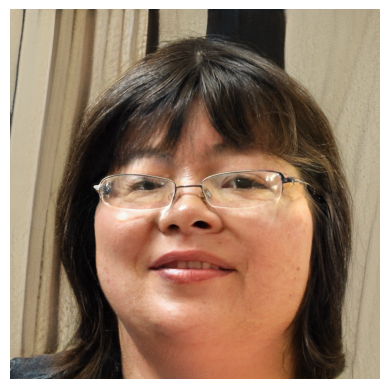

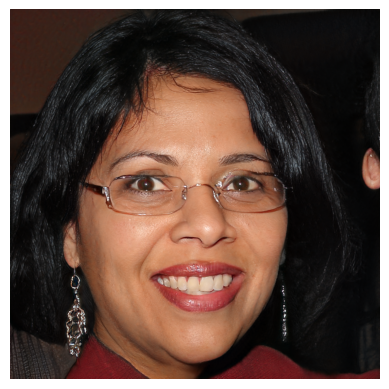

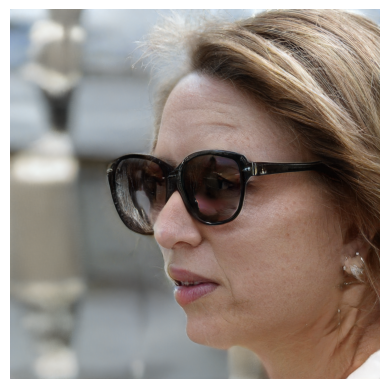

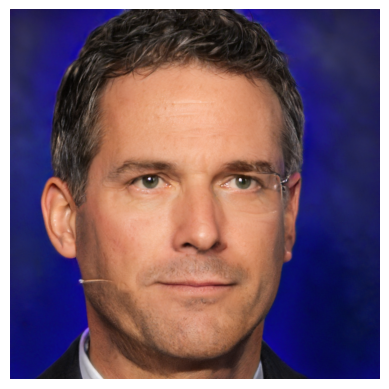

In [5]:
# Step 6: 생성된 이미지를 로드하고 보여줍니다.
from PIL import Image
import matplotlib.pyplot as plt

# 여러 시드로 생성된 이미지를 로드하고 표시
for i in range(10, 21):
    url = '/content/stylegan2-ada-pytorch/out/seed00{0}.png'.format(i)
    try:
        image = Image.open(url)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        print(f"Image seed00{i}.png not found!")